## Goal and metric

### Goal: To predict if a passenger survived the sinking of the Titanic or not.

### Metric: Accuracy, The percentage of passengers the model correctly predict.

### Exploring the Data

In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# read data and get train info
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.info()
#test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# get statisitcs  
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# show the overall survival rate 
print('Overall Survival Rate:', round(train['Survived'].mean(), 3))
#print(pd.get_dummies(train['Age']).head())

Overall Survival Rate: 0.384


## Data cleaning and feature selection

In [7]:
# Continuous Data Plot
def cont_plot(df, feature_name, target_name, palettemap, hue_order, feature_scale): 
    df['Counts'] = "" # A trick to skip using an axis (either x or y) on splitting violinplot
    fig, [axis0,axis1] = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(df[feature_name], ax=axis0);
    sns.violinplot(x=feature_name, y="Counts", hue=target_name, hue_order=hue_order, data=df,
                   palette=palettemap, split=True, orient='h', ax=axis1)
    axis1.set_xticks(feature_scale)
    plt.show()
    # WARNING: This will leave Counts column in dataset if you continues to use this dataset

# Categorical/Ordinal Data Plot
def cat_plot(df, feature_name, target_name, palettemap): 
    fig, [axis0,axis1] = plt.subplots(1,2,figsize=(10,5))
    df[feature_name].value_counts().plot.pie(autopct='%1.1f%%',ax=axis0)
    sns.countplot(x=feature_name, hue=target_name, data=df,
                  palette=palettemap,ax=axis1)
    plt.show()

    
survival_palette = {0: "black", 1: "orange"} # Color map for visualization

In [8]:
# get_dummies function
def dummies(col,train,test):
    train_dum = pd.get_dummies(train[col])
    test_dum = pd.get_dummies(test[col])
    train = pd.concat([train, train_dum], axis=1)
    test = pd.concat([test,test_dum],axis=1)
    train.drop(col,axis=1,inplace=True)
    test.drop(col,axis=1,inplace=True)
    return train, test

# delete the useless cols
dropping = ['PassengerId', 'Name', 'Ticket']
train.drop(dropping,axis=1, inplace=True)
test.drop(dropping,axis=1, inplace=True)

3    491
1    216
2    184
Name: Pclass, dtype: int64


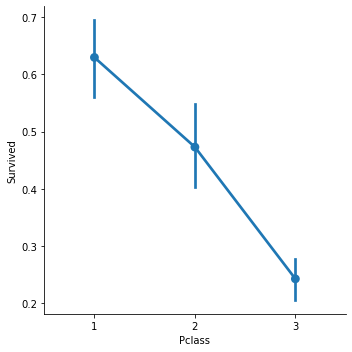

In [9]:
# pclass
# ensure no NA contained
print(train.Pclass.value_counts(dropna=False))
sns.factorplot('Pclass', 'Survived',data=train, order=[1,2,3])
# according to the graph, we found there are huge differences between
# each pclass group. keep the ft
train, test = dummies('Pclass', train, test)

male      577
female    314
Name: Sex, dtype: int64


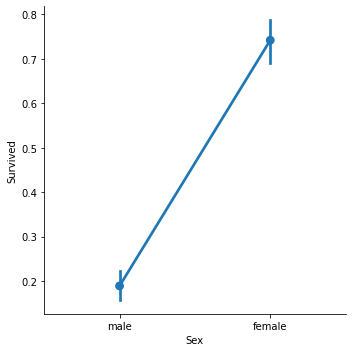

In [10]:
# sex
print(train.Sex.value_counts(dropna=False))
sns.factorplot('Sex','Survived', data=train)
# female survival rate is way better than the male
train, test = dummies('Sex', train, test)

#train.drop('male',axis=1,inplace=True)
#test.drop('male',axis=1,inplace=True)

In [11]:
#age 
#dealing the missing data
nan_num = train['Age'].isnull().sum()
print(nan_num)

177


In [12]:
# there are 177 missing value, fill with random int
age_mean = train['Age'].mean()
age_std = train['Age'].std()
filling = np.random.randint(age_mean-age_std, age_mean+age_std, size=nan_num)
train['Age'][train['Age'].isnull()==True] = filling
nan_num = train['Age'].isnull().sum()
print(nan_num)

0


In [13]:
# dealing the missing val in test
nan_num = test['Age'].isnull().sum()

In [14]:
# 86 null
age_mean = test['Age'].mean()
age_std = test['Age'].std()
#print(test['Age'].mean(), test['Age'].std())
filling = np.random.randint(age_mean-age_std,age_mean+age_std,size=nan_num)
#print(np.random.randint(age_mean-age_std,age_mean+age_std,size=nan_num))
test['Age'][test['Age'].isnull()==True]=filling
nan_num = test['Age'].isnull().sum()
print(nan_num)

0


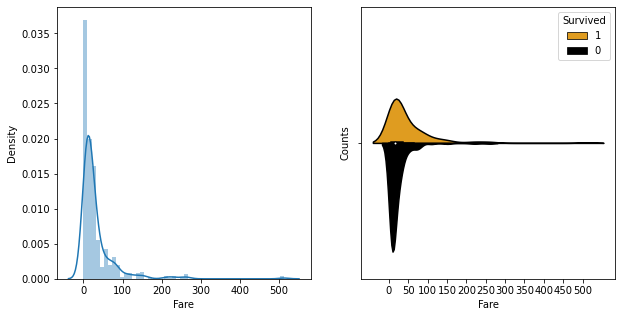

In [15]:
fare_set = train[['Fare','Survived']].copy() # Copy dataframe so method won't leave Counts column in train_set
cont_plot(fare_set, 'Fare', 'Survived', survival_palette, [1, 0], range(0,550,50))

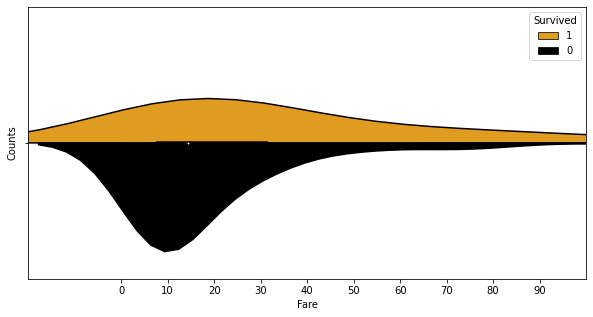

In [16]:
fare_set_mod = train[['Fare','Survived']].copy()
fare_set_mod['Counts'] = "" 
fig, axis = plt.subplots(1,1,figsize=(10,5))
sns.violinplot(x='Fare', y="Counts", hue='Survived', hue_order=[1, 0], data=fare_set_mod,
               palette=survival_palette, split=True, orient='h', ax=axis)
axis.set_xticks(range(0,100,10))
axis.set_xlim(-20,100)
plt.show()

In [17]:
#cat_plot(train, 'Fare','Survived', survival_palette)

In [28]:
dataFare=train['Fare']
dataFare
#dataFare.iloc[1]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [31]:
dataFare=train['Fare']
fr=[]
#print(dataAge.ix[0,4])


for i in range(len(dataFare)):

    if dataFare.iloc[i ]< 10:
        fr.append(1)
    elif dataFare.iloc[i]<= 30:
        fr.append(2)
    elif dataFare.iloc[i]<= 60:
        fr.append(3)
    else:
        fr.append(4)

train['FareRange']=fr


dataFare1=test['Fare']
fr1=[]
#print(dataAge.ix[0,4])


for i in range(len(dataFare1)):

    if dataFare1.iloc[i]< 10:
        fr1.append(1)
    elif dataFare1.iloc[i]<= 30:
        fr1.append(2)
    elif dataFare1.iloc[i]<= 60:
        fr1.append(3)
    else:
        fr1.append(4)

test['FareRange']=fr1



In [34]:
test['FareRange']

0      1
1      1
2      1
3      1
4      2
      ..
413    1
414    4
415    1
416    1
417    2
Name: FareRange, Length: 418, dtype: int64

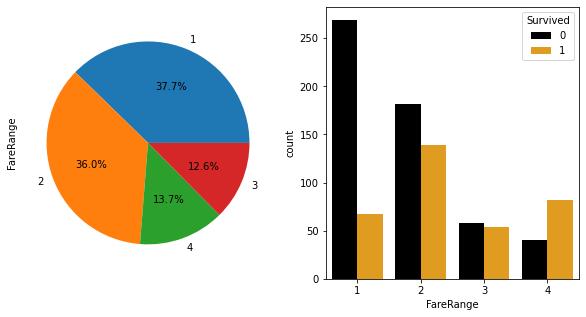

In [37]:
cat_plot(train, 'FareRange','Survived', survival_palette)

In [38]:
#cat_plot(test, 'FareRange','Survived', survival_palette)

In [41]:
dataAge=train['Age']
ar=[]
#print(dataAge.ix[0,4])


for i in range(len(dataAge)):

    if dataAge.iloc[i]< 15:
        ar.append(1)
    elif dataAge.iloc[i]<= 35:
        ar.append(2)
    elif dataAge.iloc[i]<= 45:
        ar.append(3)
    elif dataAge.iloc[i]<= 60:
        ar.append(4)
    else:
        ar.append(5)

train['ageRange']=ar


dataAge1=test['Age']
ar1=[]
#print(dataAge.ix[0,4])


for i in range(len(dataAge1)):

    if dataAge.iloc[i]< 15:
        ar1.append(1)
    elif dataAge.iloc[i]<= 35:
        ar1.append(2)
    elif dataAge.iloc[i]<= 45:
        ar1.append(3)
    elif dataAge.iloc[i]<= 60:
        ar1.append(4)
    else:
        ar1.append(5)

test['ageRange']=ar1




In [45]:
#test.iloc[25, 'ageRange']

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        418 non-null    float64
 1   SibSp      418 non-null    int64  
 2   Parch      418 non-null    int64  
 3   Fare       417 non-null    float64
 4   Cabin      91 non-null     object 
 5   Embarked   418 non-null    object 
 6   1          418 non-null    uint8  
 7   2          418 non-null    uint8  
 8   3          418 non-null    uint8  
 9   female     418 non-null    uint8  
 10  male       418 non-null    uint8  
 11  FareRange  418 non-null    int64  
 12  ageRange   418 non-null    int64  
dtypes: float64(2), int64(4), object(2), uint8(5)
memory usage: 28.3+ KB


In [47]:
train['ageRange'].head()

0    2
1    3
2    2
3    2
4    2
Name: ageRange, dtype: int64

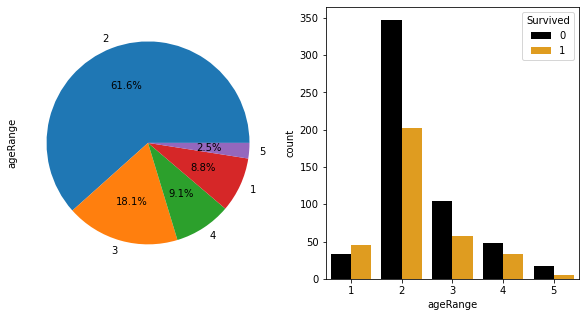

In [48]:
cat_plot(train, 'ageRange','Survived', survival_palette)

In [49]:
#cat_plot(test, 'ageRange','Survived', survival_palette)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        418 non-null    float64
 1   SibSp      418 non-null    int64  
 2   Parch      418 non-null    int64  
 3   Fare       417 non-null    float64
 4   Cabin      91 non-null     object 
 5   Embarked   418 non-null    object 
 6   1          418 non-null    uint8  
 7   2          418 non-null    uint8  
 8   3          418 non-null    uint8  
 9   female     418 non-null    uint8  
 10  male       418 non-null    uint8  
 11  FareRange  418 non-null    int64  
 12  ageRange   418 non-null    int64  
dtypes: float64(2), int64(4), object(2), uint8(5)
memory usage: 28.3+ KB


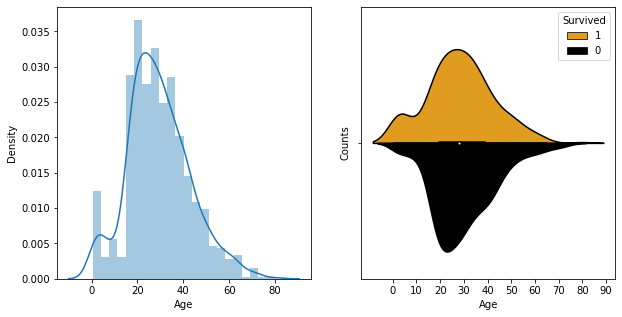

In [50]:
age_set_nonan = train[['Age','Survived']].copy().dropna(axis=0)
cont_plot(age_set_nonan, 'Age', 'Survived', survival_palette, [1, 0], range(0,100,10))

In [51]:
# there are 177 missing value, fill with random int
age_mean = train['Age'].mean()
age_std = train['Age'].std()
filling = np.random.randint(age_mean-age_std, age_mean+age_std, size=nan_num)
train['Age'][train['Age'].isnull()==True] = filling
nan_num = train['Age'].isnull().sum()
print(nan_num)

0


In [52]:
# dealing the missing val in test
nan_num = test['Age'].isnull().sum()

In [53]:
# 86 null
age_mean = test['Age'].mean()
age_std = test['Age'].std()
#print(test['Age'].mean(), test['Age'].std())
filling = np.random.randint(age_mean-age_std,age_mean+age_std,size=nan_num)
#print(np.random.randint(age_mean-age_std,age_mean+age_std,size=nan_num))
test['Age'][test['Age'].isnull()==True]=filling
nan_num = test['Age'].isnull().sum()
print(nan_num)

0


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


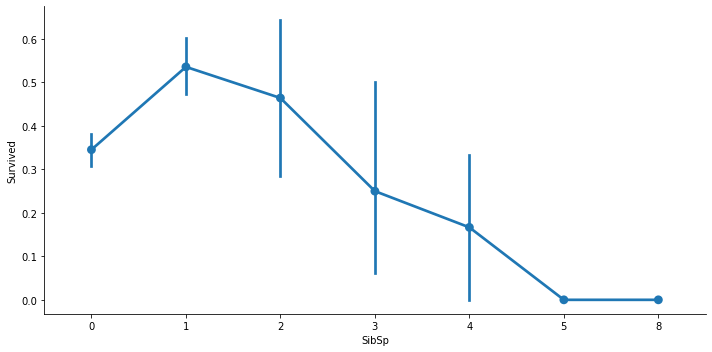

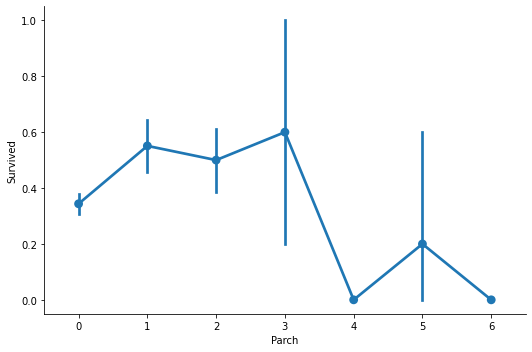

In [54]:
#family
print(train['SibSp'].value_counts(dropna=False))
print(train['Parch'].value_counts(dropna=False))

sns.factorplot('SibSp','Survived',data=train,size=5 ,aspect=2)
sns.factorplot('Parch','Survived',data=train,size=5 ,aspect=1.5)


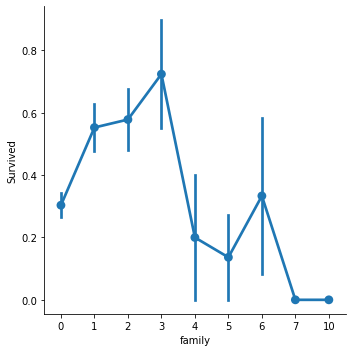

In [55]:
'''through the plot, we suggest that with more family member, 
the survival rate will drop, we can create the new col
add up the parch and sibsp to check our theory''' 

train['family'] = train['SibSp'] + train['Parch']
test['family'] = test['SibSp'] + test['Parch']
sns.factorplot('family','Survived',data=train,size=5)

train.drop(['SibSp','Parch'],axis=1,inplace=True)
test.drop(['SibSp','Parch'],axis=1,inplace=True)

In [56]:
# fare
print(train.Fare.isnull().sum())
print(test.Fare.isnull().sum())

0
1


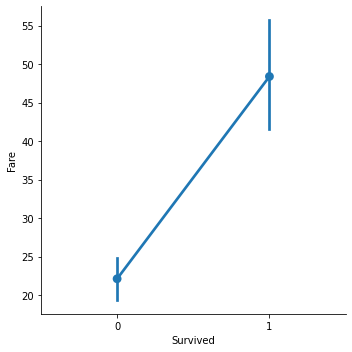

In [57]:
sns.factorplot('Survived','Fare',data=train,size=5)
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [58]:
#Cabin
# checking missing val
# 687 out of 891 are missing, drop this col
train.Cabin.isnull().sum()

687

In [59]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [60]:
#Embark
print(train.Embarked.isnull().sum())
# 2 missing value
train.Embarked.value_counts()

2


S    644
C    168
Q     77
Name: Embarked, dtype: int64

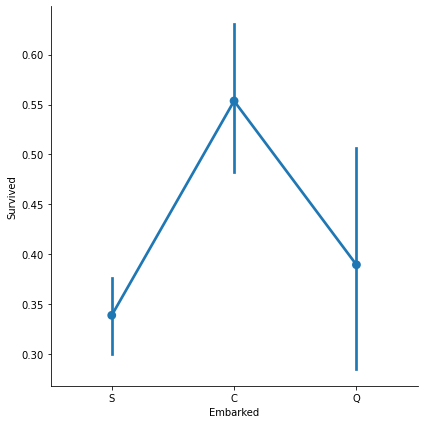

In [61]:
# fill the majority val,'s', into missing val col
train['Embarked'].fillna('S',inplace=True)

sns.factorplot('Embarked','Survived',data=train,size=6)
train,test = dummies('Embarked',train,test)


In [62]:
train.head()

,Survived,Age,Fare,1,2,3,female,male,FareRange,ageRange,family,C,Q,S
0,0,22.0,7.2500,0,0,1,0,1,1,2,1,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,4,3,1,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,2,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,3,2,1,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,2,0,0,0,1


In [63]:
train.drop('Age',axis=1, inplace=True)
test.drop('Age',axis=1, inplace=True)
train.drop('Fare',axis=1, inplace=True)
test.drop('Fare',axis=1, inplace=True)
train.head()

,Survived,1,2,3,female,male,FareRange,ageRange,family,C,Q,S
0,0,0,0,1,0,1,1,2,1,0,0,1
1,1,1,0,0,1,0,4,3,1,1,0,0
2,1,0,0,1,1,0,1,2,0,0,0,1
3,1,1,0,0,1,0,3,2,1,0,0,1
4,0,0,0,1,0,1,1,2,0,0,0,1


## Model and prediction

In [64]:
# import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

def modeling(clf,ft,target):
    acc = cross_val_score(clf,ft,target,cv=kf)
    #print(acc)
    acc_lst.append(acc.mean())
    return 

accuracy = []
def ml(ft,target,time):
    accuracy.append(acc_lst)

    #logisticregression
    logreg = LogisticRegression()
    modeling(logreg,ft,target)
    #RandomForest
    rf = RandomForestClassifier(n_estimators=50, min_samples_split=4, min_samples_leaf=2)
    modeling(rf,ft,target)
    #svc
    svc = SVC()
    modeling(svc,ft,target)
    #knn
    knn = KNeighborsClassifier(n_neighbors = 3)
    modeling(knn,ft,target)
    
    
    print(acc_lst)
    
    # see the coefficient
    logreg.fit(ft,target)
    feature = pd.DataFrame(ft.columns)
    feature.columns = ['Features']
    feature["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
    print(feature)
    return 

In [65]:
# testing no.1, using all the feature
#[0.7890011223344556, 0.8136924803591471, 0.6823793490460157, 0.6745230078563411]
#[0.7923681257014591, 0.8226711560044894, 0.7699214365881032, 0.7542087542087542] with out age
#[0.7934904601571269, 0.8181818181818182, 0.8226711560044894, 0.7912457912457912] age and fare
#[0.7934904601571269, 0.8069584736251403, 0.8226711560044894, 0.7912457912457912]
train_ft=train.drop('Survived',axis=1)
train_y=train['Survived']
#set kfkf = KFold(n_splits=,random_state=1)
kf = KFold(n_splits=3,random_state=1)
acc_lst = []
ml(train_ft,train_y,'test_1')

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [67]:
# testing no.2 no Age
train_ft=train.drop(['Survived','ageRange'],axis=1)
train_y=train['Survived']
#set kfkf = KFold(n_splits=3,random_state=1)
#kf = KFold(n_splits=3,random_state=1)
kf = KFold(n_splits=3)
acc_lst = []
ml(train_ft,train_y,'test_2')
train_ft.head()

[0.7912457912457912, 0.7901234567901234, 0.809203142536476, 0.7856341189674524]
    Features  Coefficient Estimate
0          1              0.588472
1          2              0.150139
2          3             -0.738519
3     female              1.331199
4       male             -1.331107
5  FareRange              0.256434
6     family             -0.204931
7          C              0.213974
8          Q              0.054564
9          S             -0.268446


,1,2,3,female,male,FareRange,family,C,Q,S
0,0,0,1,0,1,1,1,0,0,1
1,1,0,0,1,0,4,1,1,0,0
2,0,0,1,1,0,1,0,0,0,1
3,1,0,0,1,0,3,1,0,0,1
4,0,0,1,0,1,1,0,0,0,1


In [69]:
# test3, no FARE
train_ft_3=train.drop(['Survived','FareRange'],axis=1)
test_3 = test.drop(['FareRange'],axis=1)
train_ft.head()
# ml
#kf = KFold(n_splits=3,random_state=1)
kf = KFold(n_splits=3)
acc_lst = []
ml(train_ft_3,train_y,'test_3')

[0.8013468013468014, 0.7946127946127945, 0.8294051627384961, 0.7687991021324354]
   Features  Coefficient Estimate
0         1              1.065218
1         2              0.064369
2         3             -1.129546
3    female              1.332978
4      male             -1.332938
5  ageRange             -0.539791
6    family             -0.179063
7         C              0.198600
8         Q              0.094104
9         S             -0.292663


In [71]:
# test4, get rid of S 
train_ft_4=train.drop(['Survived','S'],axis=1)
test_4 = test.drop('S',axis=1)

# ml
#kf = KFold(n_splits=3,random_state=1)
kf = KFold(n_splits=3)
acc_lst = []
ml(train_ft_4,train_y,'test_4')

[0.7923681257014591, 0.8069584736251403, 0.8226711560044894, 0.7991021324354657]
    Features  Coefficient Estimate
0          1              0.839107
1          2              0.072334
2          3             -0.911062
3     female              1.323825
4       male             -1.323446
5  FareRange              0.272648
6   ageRange             -0.545395
7     family             -0.258363
8          C              0.399243
9          Q              0.372261


In [73]:
# test5, lose Fare and Age
train_ft_5=train.drop(['Survived','FareRange','ageRange'],axis=1)
test_5 = test.drop(['FareRange'],axis=1)
train_ft.head()
# ml
#kf = KFold(n_splits=3,random_state=1)
kf = KFold(n_splits=3)
acc_lst = []
ml(train_ft_5,train_y,'test_5')

[0.7901234567901234, 0.7912457912457912, 0.809203142536476, 0.7474747474747475]
  Features  Coefficient Estimate
0        1              0.806908
1        2              0.137599
2        3             -0.944485
3   female              1.341528
4     male             -1.341507
5   family             -0.132068
6        C              0.264453
7        Q              0.025012
8        S             -0.289444


In [75]:
accuracy_df=pd.DataFrame(data=accuracy,
                         index=['test1','test2','test3','test4'],
                         columns=['logistic','rf','svc','knn'])
accuracy_df

,logistic,rf,svc,knn
test1,0.791246,0.790123,0.809203,0.785634
test2,0.801347,0.794613,0.829405,0.768799
test3,0.792368,0.806958,0.822671,0.799102
test4,0.790123,0.791246,0.809203,0.747475
